In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

patients = pd.read_csv('Resources/Datasets/patients.csv')
services = pd.read_csv('Resources/Datasets/services_weekly.csv')
staff = pd.read_csv('Resources/Datasets/staff.csv')
staff_schedule = pd.read_csv('Resources/Datasets/staff_schedule.csv')


ModuleNotFoundError: No module named 'pandas'

In [2]:
patients.head()

NameError: name 'patients' is not defined

In [5]:
patients.shape

(1000, 7)

In [6]:
patients.describe(include= "all")

,patient_id,name,age,arrival_date,departure_date,service,satisfaction
count,1000,1000,1000.000000,1000,1000,1000,1000.000000
unique,1000,993,NaN,344,337,4,NaN
top,PAT-09484753,Matthew Moore,NaN,2025-01-19,2025-10-16,emergency,NaN
freq,1,2,NaN,9,8,263,NaN
mean,NaN,NaN,45.337000,NaN,NaN,NaN,79.597000
std,NaN,NaN,25.999912,NaN,NaN,NaN,11.550325
min,NaN,NaN,0.000000,NaN,NaN,NaN,60.000000
25%,NaN,NaN,23.000000,NaN,NaN,NaN,70.000000
50%,NaN,NaN,46.000000,NaN,NaN,NaN,80.000000
75%,NaN,NaN,68.000000,NaN,NaN,NaN,89.250000


### From the Information above, we see that the data was obtained from 1000 unique patients

In [7]:
services.tail()

,week,month,service,available_beds,patients_request,patients_admitted,patients_refused,patient_satisfaction,staff_morale,event
203,51,12,ICU,18,15,15,0,87,80,none
204,52,12,emergency,26,130,26,104,88,63,none
205,52,12,surgery,53,39,39,0,82,50,none
206,52,12,general_medicine,65,225,65,160,82,40,flu
207,52,12,ICU,22,24,22,2,80,96,none


In [8]:
services.describe()

,week,month,available_beds,patients_request,patients_admitted,patients_refused,patient_satisfaction,staff_morale
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,26.500000,6.923077,30.346154,64.870192,28.129808,36.740385,80.000000,72.567308
std,15.044539,3.634755,15.172929,58.738572,14.676791,55.015763,11.125546,15.457759
min,1.000000,1.000000,8.000000,5.000000,5.000000,0.000000,60.000000,31.000000
25%,13.750000,4.000000,18.000000,23.750000,16.000000,0.000000,70.000000,60.000000
50%,26.500000,7.000000,27.500000,49.000000,26.000000,13.500000,81.000000,73.000000
75%,39.250000,10.000000,40.000000,86.000000,37.000000,52.500000,89.000000,86.000000
max,52.000000,12.000000,74.000000,388.000000,74.000000,363.000000,99.000000,99.000000


In [9]:
staff.head()

,staff_id,staff_name,role,service
0,STF-5ca26577,Allison Hill,doctor,emergency
1,STF-02ae59ca,Noah Rhodes,doctor,emergency
2,STF-d8006e7c,Angie Henderson,doctor,emergency
3,STF-212d8b31,Daniel Wagner,doctor,emergency
4,STF-107a58e4,Cristian Santos,doctor,emergency


In [10]:
staff_schedule.tail()

,week,staff_id,staff_name,role,service,present
6547,48,STF-302eb752,Erin Edwards,nursing_assistant,ICU,0
6548,49,STF-302eb752,Erin Edwards,nursing_assistant,ICU,1
6549,50,STF-302eb752,Erin Edwards,nursing_assistant,ICU,1
6550,51,STF-302eb752,Erin Edwards,nursing_assistant,ICU,0
6551,52,STF-302eb752,Erin Edwards,nursing_assistant,ICU,1


In [11]:
patients.isnull().sum()

patient_id        0
name              0
age               0
arrival_date      0
departure_date    0
service           0
satisfaction      0
dtype: int64

In [12]:
staff.isnull().sum()

staff_id      0
staff_name    0
role          0
service       0
dtype: int64

In [13]:
services.isnull().sum()

week                    0
month                   0
service                 0
available_beds          0
patients_request        0
patients_admitted       0
patients_refused        0
patient_satisfaction    0
staff_morale            0
event                   0
dtype: int64

In [14]:
staff.isnull().sum()

staff_id      0
staff_name    0
role          0
service       0
dtype: int64

## Data Visualisation using Matplotlib

We can create new (calculated) columns on the tables to help with the visualisation.

In [15]:
# New Column on the patients dataset
# Duration in hospital (stay_duration)

patients['departure_date'] = pd.to_datetime(patients['departure_date'])
patients['arrival_date'] = pd.to_datetime(patients['arrival_date'])

# type(patients['departure_date'])

patients['stay_duration'] = (patients['departure_date'] - patients['arrival_date']).dt.days

# patients.describe()
patients

,patient_id,name,age,arrival_date,departure_date,service,satisfaction,stay_duration
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61,6
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83,1
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83,6
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81,11
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76,7
...,...,...,...,...,...,...,...,...
995,PAT-a01bf534,Amber Vang,26,2025-12-02,2025-12-04,emergency,91,2
996,PAT-87fa07bd,Martha Smith,89,2025-11-18,2025-11-30,emergency,99,12
997,PAT-8f07e894,Jennifer James,72,2025-12-12,2025-12-21,ICU,69,9
998,PAT-4ae301e1,Kara Hernandez,47,2025-02-08,2025-02-20,ICU,61,12


# Patients 

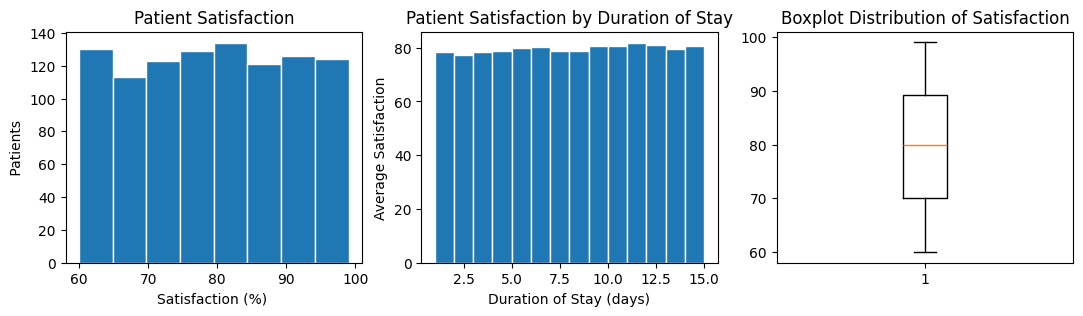

In [49]:
patients_duration_agg = patients[['satisfaction','stay_duration']]


plt.figure(figsize=(13,3))

# Frequency Distribution
plt.subplot(1,3,1)
plt.hist(patients['satisfaction'], bins=8, edgecolor = "white")
plt.title('Patient Satisfaction')
plt.xlabel('Satisfaction (%) ')
plt.ylabel(' Patients ')


plt.subplot(1,3,2)
group_by_stay_duration = patients_duration_agg.groupby(patients_duration_agg['stay_duration'], as_index= False).mean()
plt.bar(group_by_stay_duration['stay_duration'],group_by_stay_duration['satisfaction'], width=1, edgecolor = "white", align='edge')
plt.title('Patient Satisfaction by Duration of Stay')
plt.xlabel('Duration of Stay (days)')
plt.ylabel('Average Satisfaction')


plt.subplot(1,3,3)
plt.boxplot(patients['satisfaction'])
plt.title('Boxplot Distribution of Satisfaction')



plt.show()


Patient Satisfaction is generally good, with the worst being a **60 %**. Satisfaction does not vary greatly with the duration of stay at the hospital, suggesting that the service at the hospital is constant.

As seen above, the **max** function has been used on the grouped data to show the available beds in each department. This may not be accurate, but it does help to estimate the bed capacity in the hospital departments.

The **ICU** department has the most staff. This is to offer assistance to the patients in critical condition. The total number of staff in the hospital is **110**.

In [17]:
hospital_staff = staff.groupby(staff['service'], as_index=False).count()

print(hospital_staff['staff_id'].sum())

110


In [18]:
# Visualise the average satisfaction in each department according to the length of their stay. 
# Visualising was slightly complicated, I will get back to it😂

patients_agg = patients[['service','satisfaction','stay_duration']]

# satisfaction = patients_agg.groupby([patients_agg['service'],patients_agg['stay_duration']]).mean()

# fig,ax = plt.subplots()

# ax.bar(satisfaction['stay_duration'], satisfaction['satisfaction'])

# satisfaction
patients_agg.head()

,service,satisfaction,stay_duration
0,surgery,61,6
1,surgery,83,1
2,general_medicine,83,6
3,emergency,81,11
4,ICU,76,7


#### To find the how much unsatisfied patients, we must select a threshold, where we can declare patients were satisfied or not. That threshold has been set as **70 %**

Text(0, 0.5, 'Tally')

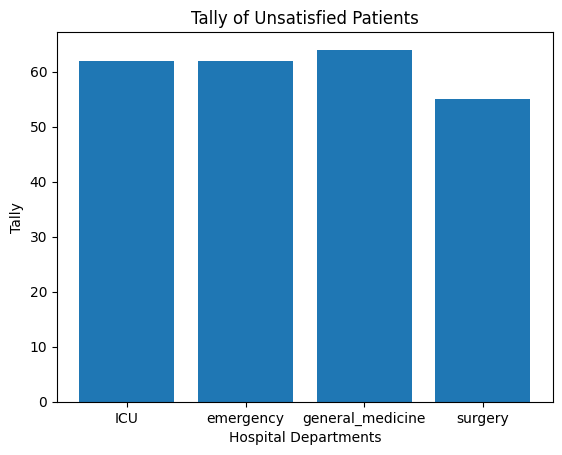

In [95]:
low_satisfaction = patients_agg.groupby(patients_agg['service'][patients_agg['satisfaction']<70]).count()

# low_satisfaction

fig, ax = plt.subplots()

ax.bar(low_satisfaction.index, low_satisfaction['satisfaction'], align='center')
ax.set_title('Tally of Unsatisfied Patients')
ax.set_xlabel('Hospital Departments')
ax.set_ylabel('Tally')

#### The bar chart shows the number of patients who were generally unsatisfied
The number of patients served in the different departments, that were unsatisfied, were close to similar. **General Medicine** however, had the most unsatisfied patients, with **64** patients

 # Services Provided

Text(0, 0.5, 'Count')

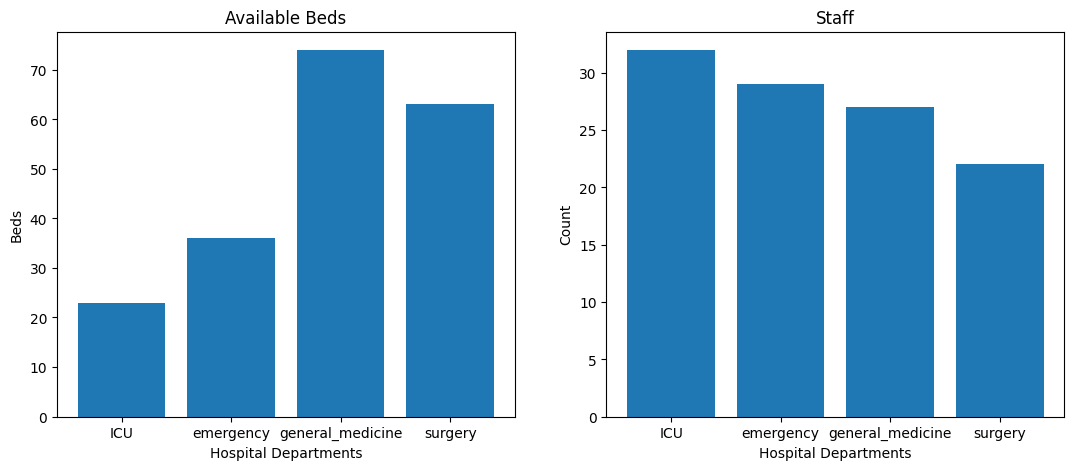

In [20]:
group_by_service = services.groupby(services['service'], as_index=False).max()

fig, axs = plt.subplots(1,2, figsize= (13,5))

axs[0].bar(group_by_service['service'], group_by_service['available_beds'])
axs[0].set_title('Available Beds')
axs[0].set_xlabel('Hospital Departments')
axs[0].set_ylabel('Beds')

hospital_staff = staff.groupby(staff['service'], as_index=False).count()

axs[1].bar(hospital_staff['service'], hospital_staff['staff_name'])
axs[1].set_title('Staff')
axs[1].set_xlabel('Hospital Departments')
axs[1].set_ylabel('Count')

### The **Services** dataset has helped us gain some insight on the state of the hospital. 

We can estimate the number of beds available in every department. The **General Medicine** department has the most beds, slightly more than 70 beds and the **ICU** has the least number of beds, at around 20 beds.

In terms of staff, the **ICU** has the most staff, more than 30. Inspite of the small capacity in the ICU, the staff is neccessary to care for the critically ill patients.
